In [50]:
import scanpy as sc
#from .autonotebook import tqdm as notebook_tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
# 
h5ad_file = "saturn_results/test256_data_at_ne_os_pt_sm_ss_v2_org_saturn_seed_0.h5ad"

In [54]:
atlas_ad = sc.read_h5ad(h5ad_file)

In [57]:
atlas_ad.obs.head()

,labels,labels2,ref_labels,species
shoot1_AAACCTGAGCGTCAAG,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at
shoot1_AAACCTGAGGTTCCTA,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at
shoot1_AAACCTGAGTAATCCC,at_MC,MC,MC,at
shoot1_AAACCTGAGTACCGGA,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at
shoot1_AAACCTGAGTCGATAA,at_VC Xylem Tracheary Element,VC Xylem Tracheary Element,VC Xylem Tracheary Element,at


# 数据预处理

In [ ]:
sc.pp.pca(atlas_ad)
sc.pp.neighbors(atlas_ad)

In [ ]:
sc.tl.umap(atlas_ad, n_components=2)

In [ ]:
## 聚类
sc.tl.leiden(atlas_ad, resolution=0.1)

In [ ]:
# 保存结果
atlas_ad.write_h5ad("output/atlas.h5ad")

# 展示数据分布

In [60]:
# 设置图形参数
sc.set_figure_params(dpi=72, color_map = 'viridis_r',figsize=[8,8] )
sc.settings.verbosity = 1
sc.logging.print_header()

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 按照物种

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


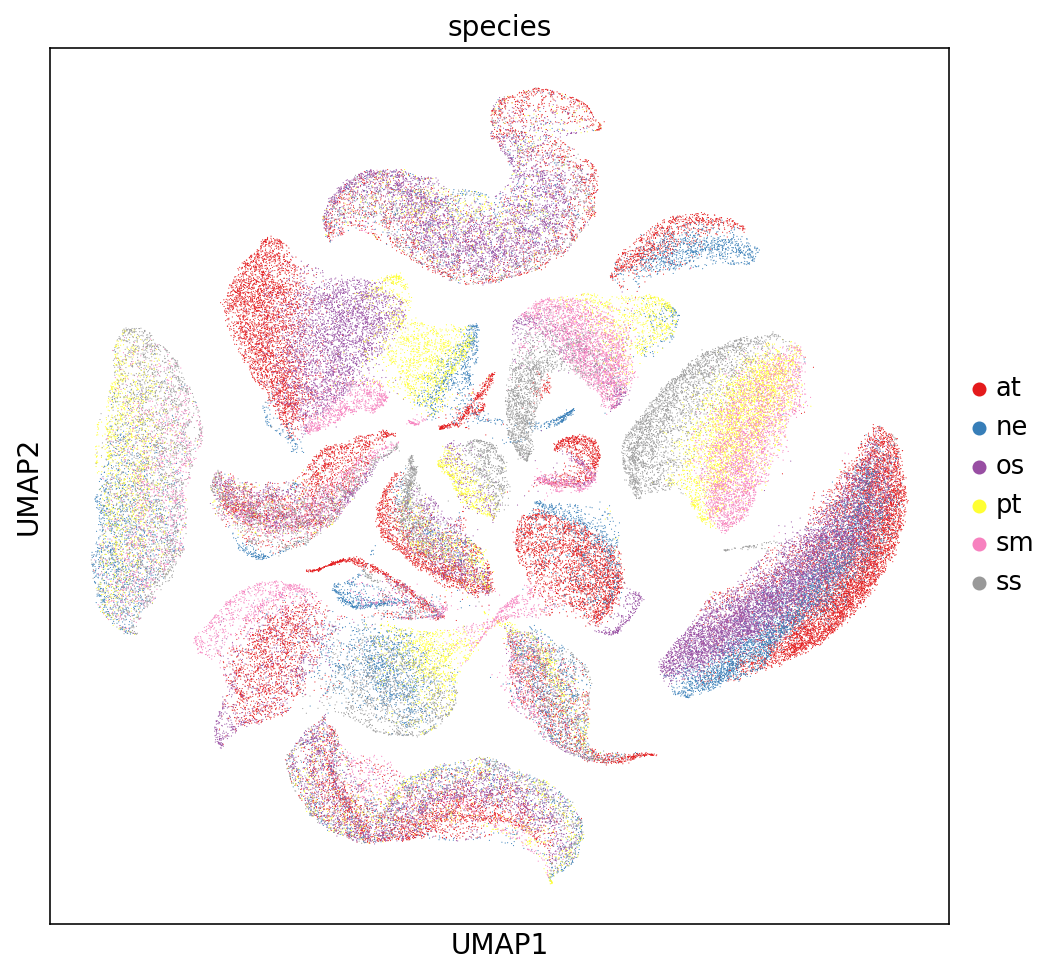

In [101]:
sc.pl.umap(atlas_ad, color="species", projection="2d", palette='Set1')

## 单独展示每个物种

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

# 获取所有不同的物种
species = atlas_ad.obs['species'].unique()

# 计算行数和列数
num_species = len(species)
num_cols = 4
num_rows = math.ceil(num_species / num_cols)

# 打开一个PDF文件
with PdfPages('output/species_plots.pdf') as pdf:
    # 逐个物种绘制
    for i in range(0, num_species, num_cols * num_rows):
        # 创建一个新的图形，并设置子图布局
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
        axes = axes.flatten()  # 将二维的 axes 数组展平为一维

        # 设置颜色映射和默认的颜色映射
        sc.set_figure_params(color_map='Set3')
        for j, highlight_species in enumerate(species[i:i + num_cols * num_rows]):
            color_map = {}
            for sp in species:
                if sp == highlight_species:
                    color_map[sp] = "red"
                else:
                    color_map[sp] = "gray"
            # 绘制UMAP图
            sc.pl.umap(atlas_ad, color='species', title=f'{highlight_species}', palette=color_map, legend_loc=None, show=False, ax=axes[j])

        # 隐藏多余的子图
        for k in range(j + 1, num_rows * num_cols):
            axes[k].axis('off')

        # 调整子图之间的间距并保存页面
        plt.tight_layout()
        pdf.savefig(fig)  # 保存当前页
        plt.close(fig)  # 关闭当前图形，释放内存


## 按照原始的labels

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


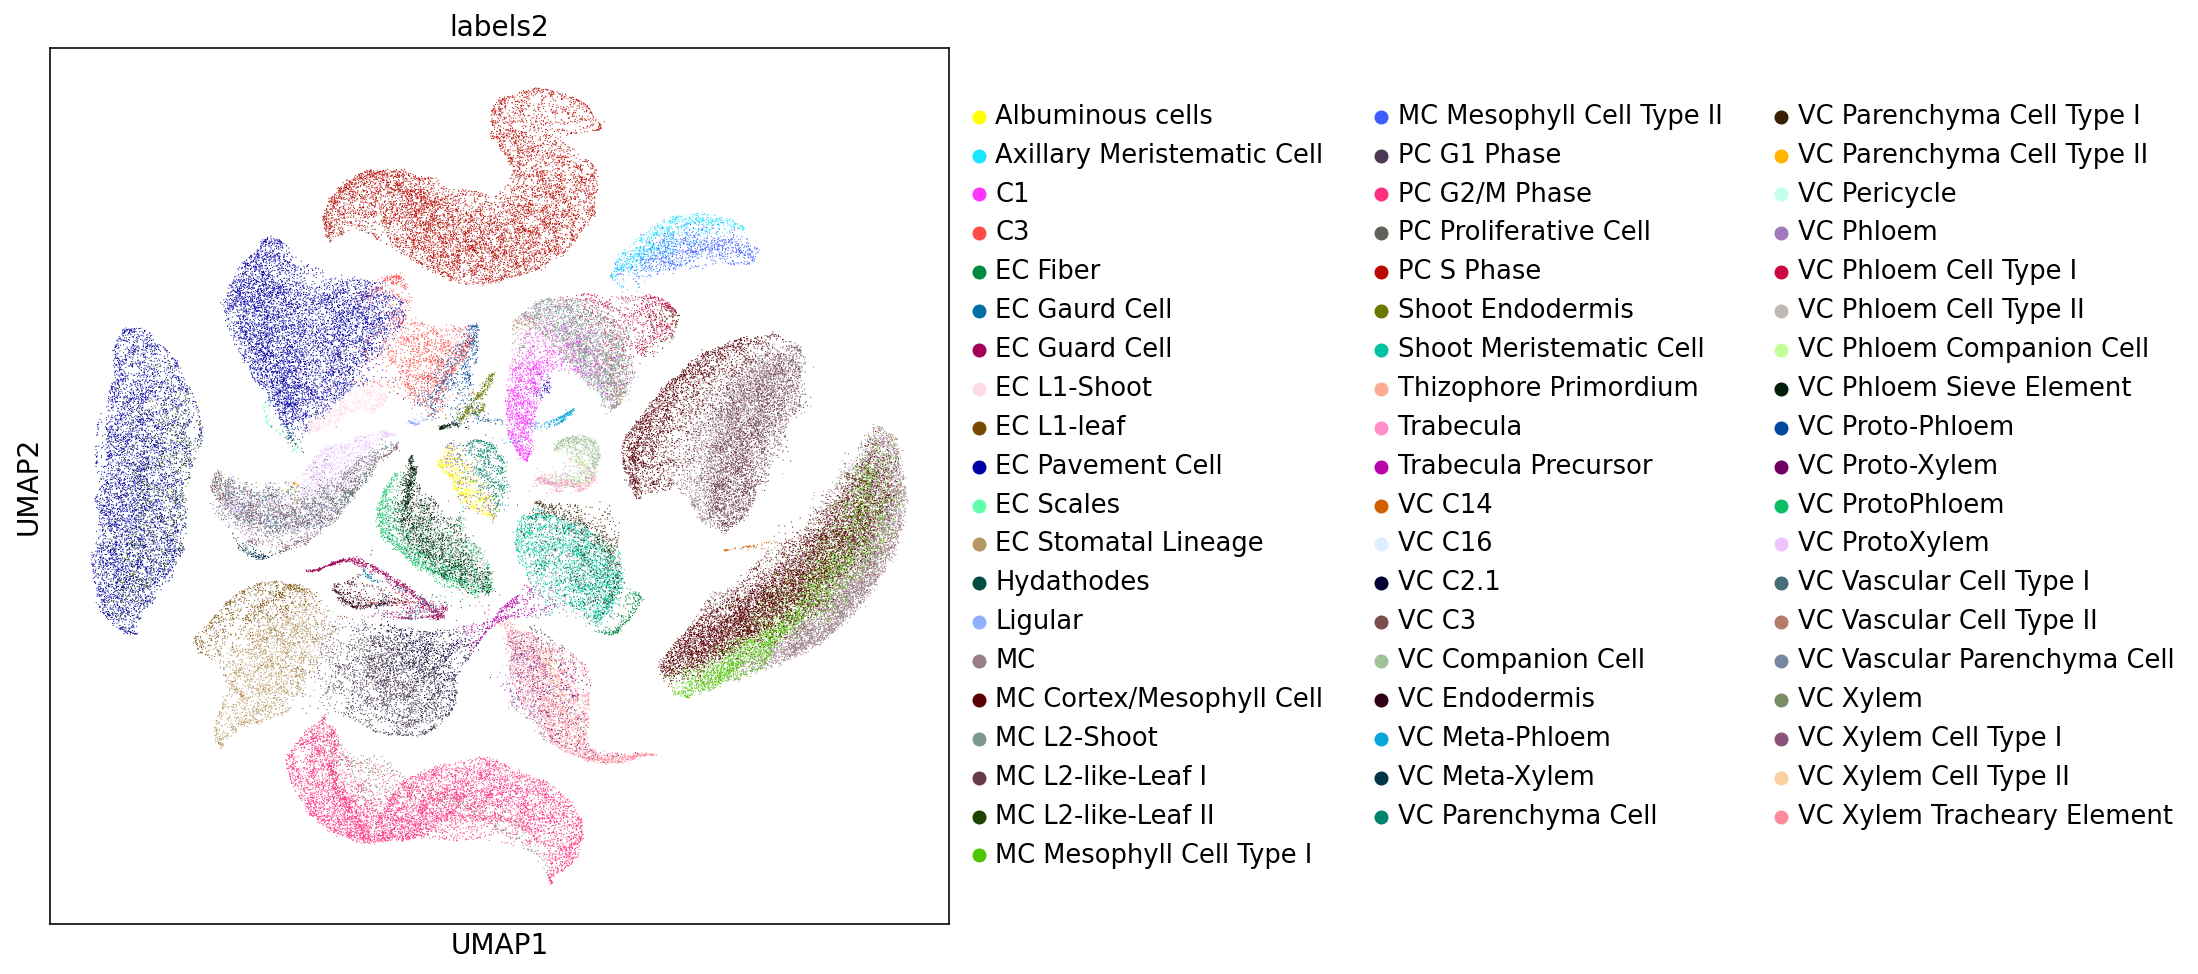

In [93]:
sc.pl.umap(atlas_ad, color="labels2")

## 单独展示各个cluster

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import math

# 获取所有的聚类簇和物种
clusters = atlas_ad.obs['labels'].unique()
species = atlas_ad.obs['species'].unique()

# 获取需要绘制的聚类簇
all_clusters = clusters.to_list()

# 计算行数和列数
num_clusters = len(all_clusters)
num_cols = 4
num_rows = math.ceil(num_clusters / num_cols)

# 打开一个PDF文件
with PdfPages('output/cluster_plots.pdf') as pdf:
    # 逐个聚类簇绘制
    for i in range(0, num_clusters, num_cols * num_rows):
        # 创建一个新的图形，并设置子图布局
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
        axes = axes.flatten()  # 将二维的 axes 数组展平为一维

        # 设置颜色映射和默认的颜色映射
        sc.set_figure_params(color_map='Set3')
        for j, highlight_cluster in enumerate(all_clusters[i:i + num_cols * num_rows]):
            color_map = {}
            for cluster in all_clusters:
                if cluster == highlight_cluster:
                    color_map[cluster] = "red"
                else:
                    color_map[cluster] = "gray"
            # 绘制UMAP图
            sc.pl.umap(atlas_ad, color='labels', title=f'{highlight_cluster}', palette=color_map, legend_loc=None, show=False, ax=axes[j])

        # 隐藏多余的子图
        for k in range(j + 1, num_rows * num_cols):
            axes[k].axis('off')

        # 调整子图之间的间距并保存页面
        plt.tight_layout()
        pdf.savefig(fig)  # 保存当前页
        plt.close(fig)  # 关闭当前图形，释放内存


## 不同cluster的species的占比

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


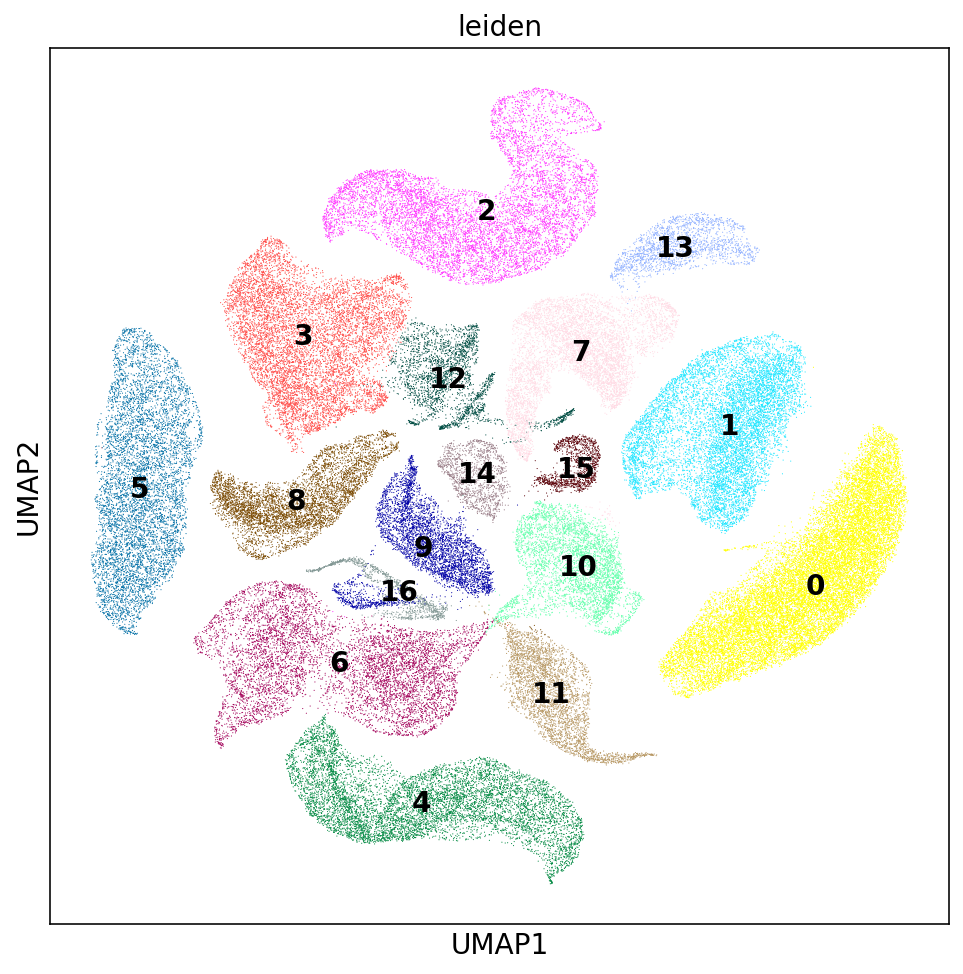

In [133]:
sc.pl.umap(adata=atlas_ad, color='leiden', legend_loc='on data')

/tmp/ipykernel_1173409/4139073530.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_table = data.groupby(['leiden', 'species']).size().unstack(fill_value=0)


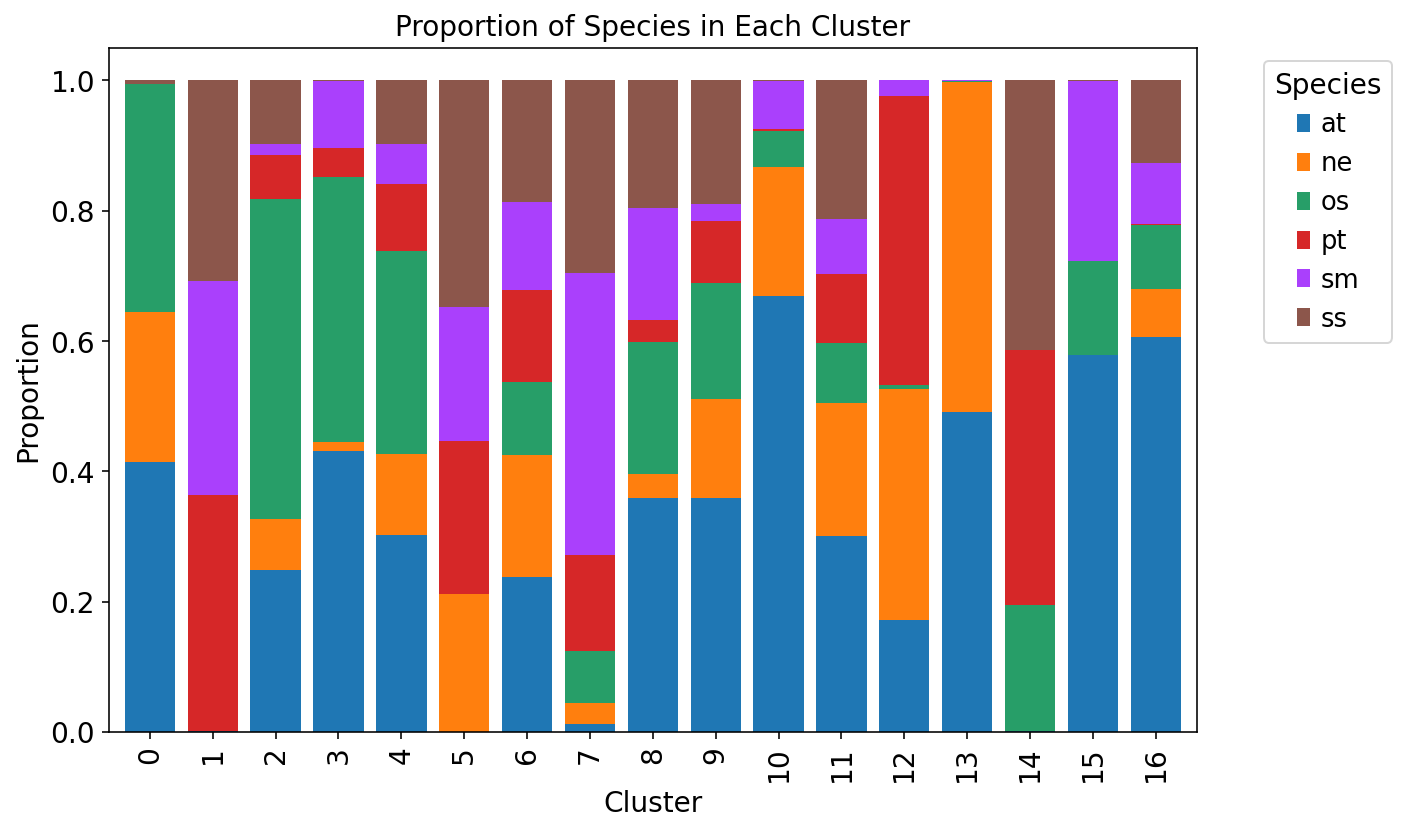

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据转换为DataFrame
data = pd.DataFrame(atlas_ad.obs)

# 计算每个聚类中每种物种的计数
count_table = data.groupby(['leiden', 'species']).size().unstack(fill_value=0)

# 将计数转换为比例
proportion_table = count_table.div(count_table.sum(axis=1), axis=0)

# 绘制堆叠柱状图
ax = proportion_table.plot(kind='bar', stacked=True, figsize=(10, 6), width=.8)

# 设置图形的标题和标签
ax.set_title('Proportion of Species in Each Cluster')
ax.set_xlabel('Cluster')
ax.set_ylabel('Proportion')
ax.grid(False)
# 显示图例
ax.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()


# 相似性评估

In [106]:
%run scripts/utils.py

In [111]:
all_nbrs = cross_species_knn_all(atlas_ad, col='labels', metric='cosine', space='raw', k=5,
                                     species='at', consider_same_species=False)

In [115]:
df = pd.DataFrame(all_nbrs, columns=['at','other'])

In [118]:
df = df.sort_values('at')

# Macrogene differential expression

In [126]:
import pickle

In [127]:
with open("saturn_results/test256_data_at_ne_os_pt_sm_ss_v2_org_saturn_seed_0_genes_to_macrogenes.pkl", "rb") as f:
    macrogene_weights = pickle.load(f)

In [128]:
# macrogene weights is a dictionary of (species_{gene name}) : [gene to macrogen weight](1x2000)
len(macrogene_weights)

48000

In [104]:
# Create a copy of the adata with macrogenes as the X values
macrogene_adata = sc.AnnData(atlas_ad.obsm["macrogenes"])
macrogene_adata.obs = atlas_ad.obs


In [131]:
# 行是细胞, 列是 macrogene, 对应的是每个基因的权重
macrogene_adata.shape

(98396, 2000)

In [132]:
macrogene_adata.obs

,labels,labels2,ref_labels,species,leiden
shoot1_AAACCTGAGCGTCAAG,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at,3
shoot1_AAACCTGAGGTTCCTA,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at,3
shoot1_AAACCTGAGTAATCCC,at_MC,MC,MC,at,0
shoot1_AAACCTGAGTACCGGA,at_EC Pavement Cell,EC Pavement Cell,EC Pavement Cell,at,3
shoot1_AAACCTGAGTCGATAA,at_VC Xylem Tracheary Element,VC Xylem Tracheary Element,VC Xylem Tracheary Element,at,11
...,...,...,...,...,...
sm3_TTTGTTGCATCTCAAG-1,ss_VC C3,VC C3,VC C3,ss,8
sm3_TTTGTTGGTCGGATTT-1,ss_VC C3,VC C3,VC C3,ss,8
sm3_TTTGTTGGTGCACATT-1,ss_PC G2/M Phase,PC G2/M Phase,PC G2/M Phase,ss,4
sm3_TTTGTTGTCGTCCTTG-1,ss_MC Cortex/Mesophyll Cell,MC Cortex/Mesophyll Cell,MC Cortex/Mesophyll Cell,ss,1


In [134]:
# 基于给定分组, 分析差异
sc.tl.rank_genes_groups(macrogene_adata, groupby="leiden", groups=["11"], method="wilcoxon")

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


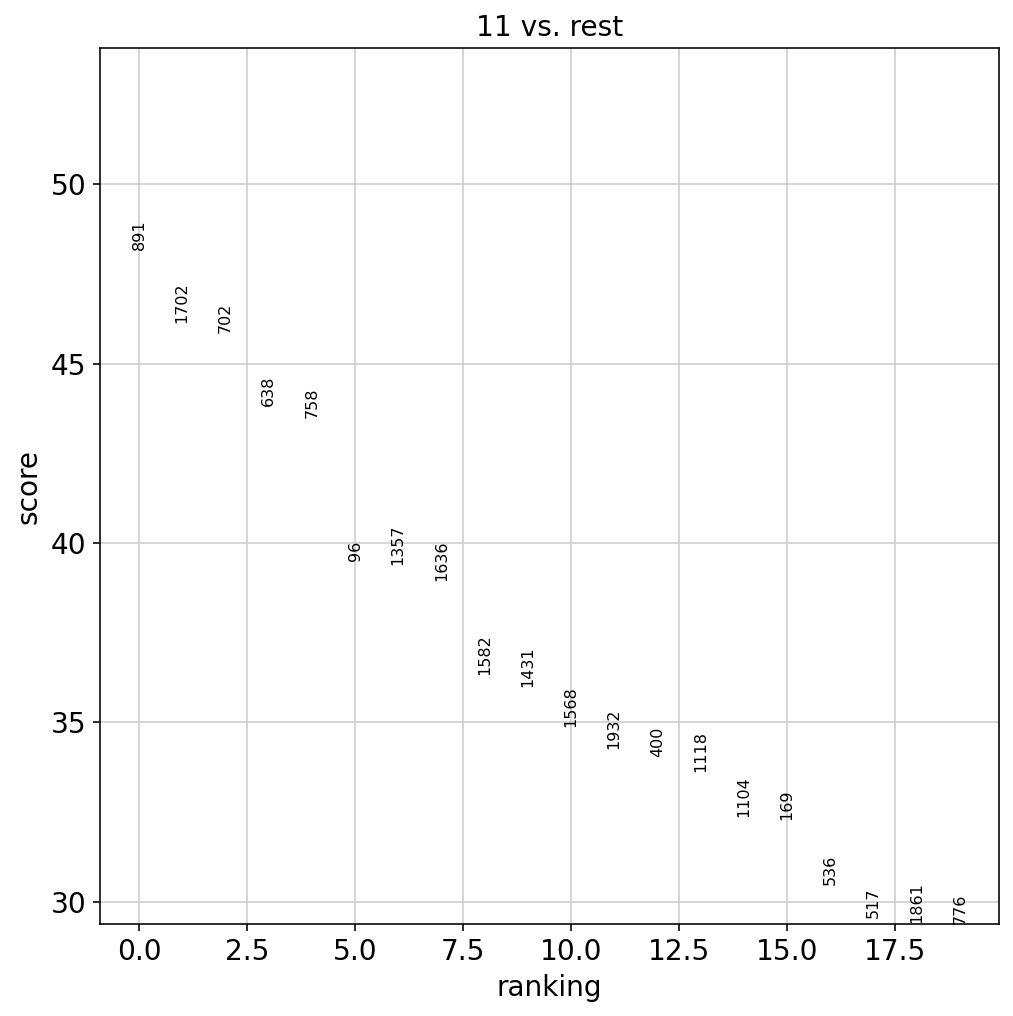

In [141]:
sc.pl.rank_genes_groups(macrogene_adata)

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


categories: 0, 1, 2, etc.
var_group_labels: 11


/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, 

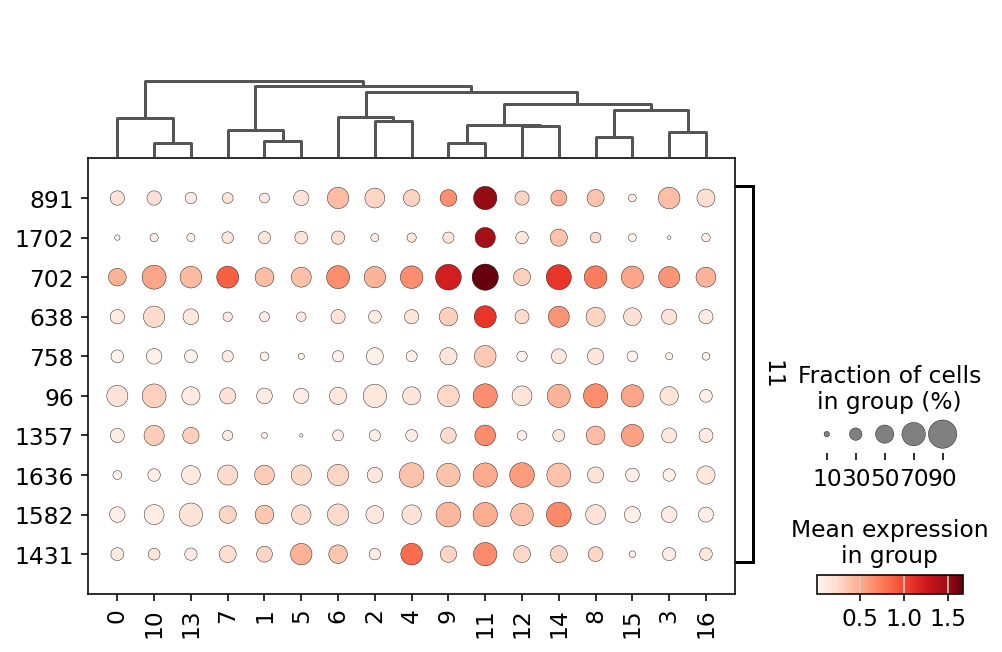

In [142]:
sc.pl.rank_genes_groups_dotplot(macrogene_adata,swap_axes=True)

In [136]:
de_df = sc.get.rank_genes_groups_df(macrogene_adata, group="11").head(20)
de_df

/home/xzg/miniforge3/envs/SATURN/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


,names,scores,logfoldchanges,pvals,pvals_adj
0,891,48.161415,3.507457,0.000000e+00,0.000000e+00
1,1702,46.133827,4.648853,0.000000e+00,0.000000e+00
2,702,45.873116,2.432926,0.000000e+00,0.000000e+00
3,638,43.814041,3.412678,0.000000e+00,0.000000e+00
4,758,43.490990,2.665792,0.000000e+00,0.000000e+00
5,96,39.513577,2.007508,0.000000e+00,0.000000e+00
6,1357,39.403759,2.749007,0.000000e+00,0.000000e+00
7,1636,38.937920,1.565120,0.000000e+00,0.000000e+00
8,1582,36.313396,1.528621,9.944248e-289,2.209833e-286
9,1431,35.978008,1.612523,1.847060e-283,3.694121e-281


In [137]:
def get_scores(macrogene):
    '''
    Given the index of a macrogene, return the scores by gene for that centroid
    '''
    scores = {}
    for (gene), score in macrogene_weights.items():
        scores[gene] = score[int(macrogene)]
    return scores

In [138]:
macrogene = 891
df = pd.DataFrame(get_scores(macrogene).items(), columns=["gene", "weight"])\
        .sort_values("weight", ascending=False)

In [139]:
for macrogene in de_df["names"]:
    print(f"Macrogene {macrogene}")
    df = pd.DataFrame(get_scores(macrogene).items(), columns=["gene", "weight"])\
            .sort_values("weight", ascending=False)
    #df.reset_index(inplace=True)
    # get the rank of the gene in df and print it
    #print(df[df["gene"] == gene].index[0])
    display(df.head(20))



Macrogene 891


,gene,weight
14949,ne_TRINITY-DN7525-c0-g1-i3.p1,1.578373
43833,ss_TRINITY-DN5519-c0-g3-i1,1.506355
30619,pt_PtJG00220,1.444004
11749,ne_TRINITY-DN3148-c0-g1-i9.p1,1.429419
18741,os_Os03g0640800,1.398425
23965,os_Os12g0612700,1.375953
29849,pt_Pt9G37640,1.249045
9833,ne_TRINITY-DN1582-c0-g2-i8.p1,1.208000
27701,pt_Pt6G16270,1.200586
42412,ss_TRINITY-DN5856-c0-g1-i6,1.190702


Macrogene 1702


,gene,weight
6024,at_AT5G19530,1.533113
34168,sm_Sm-0293430,1.352521
32410,sm_Sm-0056290,1.297583
17431,os_Os02g0237100,1.280487
12591,ne_TRINITY-DN4220-c0-g2-i1.p1,1.274645
43623,ss_TRINITY-DN13038-c0-g2-i2,1.262600
15481,ne_TRINITY-DN8782-c0-g1-i1.p1,1.189522
14616,ne_TRINITY-DN7080-c0-g1-i2.p1,1.173391
32611,sm_Sm-0085520,1.158751
28588,pt_Pt7G36030,1.155467


Macrogene 702


,gene,weight
11122,ne_TRINITY-DN2458-c0-g2-i1.p1,1.977136
15991,ne_TRINITY-DN9987-c0-g1-i1.p1,1.974171
38944,sm_Sm-0976780,1.862488
1887,at_AT2G01950,1.780254
4887,at_AT4G20270,1.747873
38527,sm_Sm-0919020,1.668759
17187,os_Os01g0957100,1.664246
25991,pt_Pt3G45490,1.584172
45126,ss_TRINITY-DN3305-c0-g1-i8,1.521617
27692,pt_Pt6G15650,1.508520


Macrogene 638


,gene,weight
14979,ne_TRINITY-DN7576-c0-g1-i3.p1,1.389802
22697,os_Os10g0147400,1.293281
43131,ss_TRINITY-DN12468-c0-g2-i11,1.171218
18379,os_Os03g0244600,1.128056
40881,ss_TRINITY-DN11570-c0-g1-i2,1.102185
29472,pt_Pt9G01750,1.065332
2112,at_AT2G21050,1.041934
43256,ss_TRINITY-DN15431-c0-g1-i3,1.036134
23203,os_Os11g0169200,0.989678
16989,os_Os01g0856500,0.952010


Macrogene 758


,gene,weight
36801,sm_Sm-0674860,1.010892
37608,sm_Sm-0789170,0.948850
17806,os_Os02g0673500,0.833067
46056,ss_TRINITY-DN8229-c0-g1-i8,0.802176
1335,at_AT1G64625,0.771147
2425,at_AT2G31280,0.724241
23191,os_Os11g0158500,0.685807
152,at_AT1G06150,0.677048
31356,pt_PtQG09430,0.508959
46840,ss_TRINITY-DN11065-c1-g1-i11,0.358641


Macrogene 96


,gene,weight
23680,os_Os12g0181600,1.182526
23679,os_Os12g0181500,1.059681
985,at_AT1G47670,0.814294
23697,os_Os12g0194900,0.807728
19605,os_Os04g0565500,0.754504
17052,os_Os01g0882800,0.744261
20873,os_Os06g0556000,0.724051
22697,os_Os10g0147400,0.705185
23824,os_Os12g0485600,0.662879
30491,pt_PtXG42580,0.646163


Macrogene 1357


,gene,weight
40472,ss_TRINITY-DN53606-c0-g1-i1,1.416488
45441,ss_TRINITY-DN56122-c0-g2-i2,1.240603
46536,ss_TRINITY-DN15550-c0-g1-i8,1.210877
26261,pt_Pt4G00720,1.081921
29050,pt_Pt8G25010,1.072917
24906,pt_Pt2G19980,1.040003
33248,sm_Sm-0174440,1.031650
4703,at_AT4G14410,0.938406
3736,at_AT3G25710,0.922958
32146,sm_Sm-0022160,0.913159


Macrogene 1636


,gene,weight
26651,pt_Pt4G35550,0.569885
46120,ss_TRINITY-DN1190-c1-g1-i2,0.492126
6972,at_AT5G62580,0.435420
26148,pt_Pt3G62840,0.397144
21070,os_Os06g0705500,0.394685
29104,pt_Pt8G29360,0.389399
28546,pt_Pt7G33230,0.357076
17456,os_Os02g0258300,0.346806
1212,at_AT1G59850,0.343269
25495,pt_Pt2G71460,0.342169


Macrogene 1582


,gene,weight
19800,os_Os04g0664400,1.034244
43034,ss_TRINITY-DN9775-c0-g1-i6,0.869861
43335,ss_TRINITY-DN501-c1-g1-i4,0.597029
25597,pt_Pt3G05520,0.577440
20420,os_Os05g0561600,0.546485
30788,pt_PtJG13900,0.538928
43797,ss_TRINITY-DN24457-c0-g1-i2,0.533474
42841,ss_TRINITY-DN4193-c0-g1-i2,0.481464
43035,ss_TRINITY-DN9775-c0-g2-i1,0.469985
11957,ne_TRINITY-DN3380-c0-g1-i1.p1,0.446824


Macrogene 1431


,gene,weight
8219,ne_TRINITY-DN10520-c0-g2-i1.p1,1.202675
37750,sm_Sm-0807980,1.119493
15244,ne_TRINITY-DN8191-c0-g1-i1.p1,1.113758
33383,sm_Sm-0191510,1.076038
9231,ne_TRINITY-DN13419-c0-g1-i1.p1,1.036666
33976,sm_Sm-0269610,1.006301
43360,ss_TRINITY-DN578-c0-g1-i8,0.988201
38280,sm_Sm-0885380,0.969131
10849,ne_TRINITY-DN22218-c0-g1-i1.p1,0.940813
11424,ne_TRINITY-DN274-c0-g3-i1.p1,0.936488


Macrogene 1568


,gene,weight
13600,ne_TRINITY-DN5590-c0-g1-i4.p1,1.104357
24930,pt_Pt2G21250,0.995425
2067,at_AT2G19110,0.851703
17373,os_Os02g0196600,0.773963
27888,pt_Pt6G36880,0.645429
6470,at_AT5G44790,0.621964
39869,sm_Sm-1117030,0.600803
15132,ne_TRINITY-DN7895-c0-g1-i1.p1,0.582014
26530,pt_Pt4G20770,0.534477
33840,sm_Sm-0250410,0.519644


Macrogene 1932


,gene,weight
36534,sm_Sm-0636860,0.862343
34603,sm_Sm-0357710,0.845193
37962,sm_Sm-0836080,0.840707
16720,os_Os01g0707500,0.702247
19737,os_Os04g0631600,0.625429
1251,at_AT1G61660,0.614686
25462,pt_Pt2G69830,0.555165
39828,sm_Sm-1110150,0.545790
3578,at_AT3G20640,0.528485
5161,at_AT4G29100,0.447071


Macrogene 400


,gene,weight
13102,ne_TRINITY-DN491-c0-g2-i1.p1,1.667954
23158,os_Os11g0137000,1.405728
28728,pt_Pt7G53190,1.393166
1621,at_AT1G73590,1.297464
40626,ss_TRINITY-DN6937-c0-g1-i6,1.253091
17924,os_Os02g0743400,1.246382
20706,os_Os06g0232300,1.064560
1747,at_AT1G77110,1.042542
43705,ss_TRINITY-DN8941-c0-g1-i10,0.965016
1551,at_AT1G70940,0.838036


Macrogene 1118


,gene,weight
32320,sm_Sm-0044910,0.419916
38447,sm_Sm-0907360,0.406750
42288,ss_TRINITY-DN5275-c0-g2-i2,0.369636
45032,ss_TRINITY-DN11928-c0-g1-i5,0.344500
46396,ss_TRINITY-DN81367-c0-g1-i9,0.317319
37671,sm_Sm-0798310,0.315739
45107,ss_TRINITY-DN3368-c0-g1-i2,0.308537
43698,ss_TRINITY-DN6750-c0-g1-i1,0.305122
15779,ne_TRINITY-DN9492-c0-g2-i2.p1,0.298285
36116,sm_Sm-0580260,0.293565


Macrogene 1104


,gene,weight
6190,at_AT5G26000,0.528084
3222,at_AT3G09260,0.506476
36354,sm_Sm-0611160,0.464361
3501,at_AT3G18080,0.447047
20062,os_Os05g0244500,0.442177
38710,sm_Sm-0948650,0.428355
37378,sm_Sm-0758600,0.410695
6188,at_AT5G25980,0.409222
14919,ne_TRINITY-DN747-c0-g1-i2.p1,0.396266
34962,sm_Sm-0409240,0.392941


Macrogene 169


,gene,weight
22048,os_Os08g0482600,1.548599
6038,at_AT5G20230,1.420249
30281,pt_PtXG16320,1.385915
39839,sm_Sm-1112550,1.127757
33755,sm_Sm-0239750,1.088025
22049,os_Os08g0482700,1.075982
27209,pt_Pt5G30330,1.029315
3784,at_AT3G27200,1.016785
39132,sm_Sm-1010050,1.009505
39841,sm_Sm-1112650,0.978906


Macrogene 536


,gene,weight
28750,pt_Pt7G55150,0.655372
28751,pt_Pt7G55190,0.617372
17841,os_Os02g0699700,0.598119
41748,ss_TRINITY-DN33714-c0-g1-i1,0.544727
39080,sm_Sm-0999680,0.531763
34818,sm_Sm-0386430,0.492472
11638,ne_TRINITY-DN3012-c3-g1-i1.p1,0.481296
34683,sm_Sm-0367990,0.479416
28753,pt_Pt7G55290,0.451013
16456,os_Os01g0514600,0.450824


Macrogene 517


,gene,weight
43735,ss_TRINITY-DN8361-c0-g2-i3,1.804467
35889,sm_Sm-0542470,1.410617
12917,ne_TRINITY-DN462-c2-g2-i1.p1,1.352012
9672,ne_TRINITY-DN15145-c0-g1-i1.p1,1.330803
8017,ne_TRINITY-DN10056-c0-g1-i1.p1,1.322039
25162,pt_Pt2G42130,1.276792
5749,at_AT5G09220,1.198690
7010,at_AT5G63850,1.014862
27688,pt_Pt6G15230,0.985528
33423,sm_Sm-0196180,0.981936


Macrogene 1861


,gene,weight
39304,sm_Sm-1036930,0.680788
38642,sm_Sm-0934230,0.660535
39835,sm_Sm-1112200,0.578633
35105,sm_Sm-0429700,0.474835
37751,sm_Sm-0808350,0.413537
42177,ss_TRINITY-DN5600-c0-g1-i1,0.402401
33750,sm_Sm-0239200,0.386517
38346,sm_Sm-0896320,0.381614
13634,ne_TRINITY-DN56562-c2-g1-i1.p1,0.379947
39940,sm_Sm-1122800,0.366362


Macrogene 776


,gene,weight
8806,ne_TRINITY-DN12159-c1-g1-i1.p1,1.867795
27868,pt_Pt6G34150,1.760546
46261,ss_TRINITY-DN23804-c1-g2-i3,1.657809
18307,os_Os03g0205700,1.648738
42220,ss_TRINITY-DN74690-c0-g1-i1,1.593002
18944,os_Os03g0767600,1.460767
6578,at_AT5G48800,1.367054
2994,at_AT2G47860,1.347844
12293,ne_TRINITY-DN38075-c0-g1-i3.p1,1.299951
4052,at_AT3G50780,1.257878
